In [110]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# File to Load (Remember to Change These)
california_crimes_df = Path("Resources/california_department_of_justice_1998_to_2023.csv")
US_inflation_rates_df = Path("Resources/US_Inflation_Rates_1998_to_2023.csv")

# Read School and Student Data File and store into Pandas DataFrames
california_crimes = pd.read_csv(california_crimes_df)
US_inflation_rates = pd.read_csv(US_inflation_rates_df)

In [2]:
california_crimes.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,Other.1,Over $400,Over $200,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"133,596","186,841",0,"117,021","154,796","265,075","14,314","4,687","4,346","5,281"
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"120,898","169,249",0,"106,668","140,138","245,588","14,454","4,655","4,133","5,666"
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"128,376","175,013",0,"102,424","138,102","236,025","14,406","4,669","4,616","5,121"
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"130,778","195,037",0,"106,602","144,146","243,706","15,060","4,612","5,357","5,091"
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"128,573","208,367",0,"110,107","143,798","250,147","14,007","4,119","5,473","4,415"


In [3]:
US_inflation_rates.head()

,Year,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,2.40%,1.25%,Expansion (1.7%),War on Terror


In [4]:
US_inflation_rates.columns

Index(['Year', 'Inflation Rate YOY, From Previous Dec.', 'Federal Funds Rate',
       'Business Cycle', 'Enents Affecting Inflation'],
      dtype='object')

In [5]:
california_crimes.columns

Index(['Year', 'Violent Crimes', 'Homicide',
       'Rape (Forcible Rape prior to 2014)', 'Rape', 'Attempted Rape',
       'Robbery', 'Firearm', 'Knife or Cutting Instrument', 'Other Weapon',
       'Strong-Arm', 'Highway', 'Commercial', 'Gas Station',
       'Convenience Store', 'Residence', 'Bank', 'Miscellaneous',
       'Aggravated Assault', 'Firearm.1', 'Knife or Cutting Instrument.1',
       'Other Weapon.1', 'Hands  Fists  Feet', 'Property Crimes', 'Burglary',
       'Forcible Entry', 'No Force', 'Residence.1', 'Night', 'Day', 'Unknown',
       'Non-Residence', 'Night.1', 'Day.1', 'Unknown.1', 'Motor Vehicle Theft',
       'Automotive', 'Trucks and Buses', 'Other', 'Larceny-Theft',
       'Pocket-Picking', 'Purse-Snatching', 'Shoplifting',
       'From Motor Vehicle', 'Motor Vehicle Accessories', 'Bicycles',
       'From Building', 'Coin Operated Machine', 'Other.1', 'Over $400',
       'Over $200', '$200 through $400', '$50 through $199', 'Under $50',
       'Arson', 'Structura

In [6]:
# Combine the data into a single dataset.
df = pd.merge(california_crimes, US_inflation_rates, how="left", on=["Year", "Year"])
df.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",2.40%,1.25%,Expansion (1.7%),War on Terror


In [7]:
# Rename columns
new_column_names = {
    'Violent Crimes': 'Violent_Crimes',
    'Homicide': 'Homicide',
    'Rape (Forcible Rape prior to 2014)': 'Sexual_Assault_Prior_to_2014',
    'Rape': 'Sexual_Assault',
    'Attempted Rape': 'Attempted_Sexual_Assault',
    'Robbery': 'Robbery',
    'Firearm': 'Firearm',
    'Knife or Cutting Instrument': 'Knife_or_Cutting_Instrument',
    'Other Weapon': 'Other_Weapon',
    'Inflation Rate YOY, From Previous Dec.': 'Inflation_Rate',
    'Federal Funds Rate': 'Federal_Funds_Rate',
    'Business Cycle': 'Business_Cycle',
    'Events Affecting Inflation': 'Events_Affecting_Inflation'
}

df = df.rename(columns=new_column_names)

# Display the updated DataFrame
df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",2.40%,1.25%,Expansion (1.7%),War on Terror


In [8]:
df['Inflation_Rate'] = df['Inflation_Rate'].str.rstrip('%').astype(float) / 100.0
df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",0.016,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",0.027,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",0.034,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",0.016,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",0.024,1.25%,Expansion (1.7%),War on Terror


In [9]:
# Descriptive statistics
print(df.describe())

              Year  Inflation_Rate
count    26.000000       26.000000
mean   2010.500000        0.025231
std       7.648529        0.015575
min    1998.000000        0.001000
25%    2004.250000        0.016000
50%    2010.500000        0.022000
75%    2016.750000        0.032250
max    2023.000000        0.070000


In [10]:
df['Violent_Crimes'] = df['Violent_Crimes'].str.replace(',', '').astype(int)

In [11]:
df['Robbery'] = df['Robbery'].str.replace(',', '').astype(int)

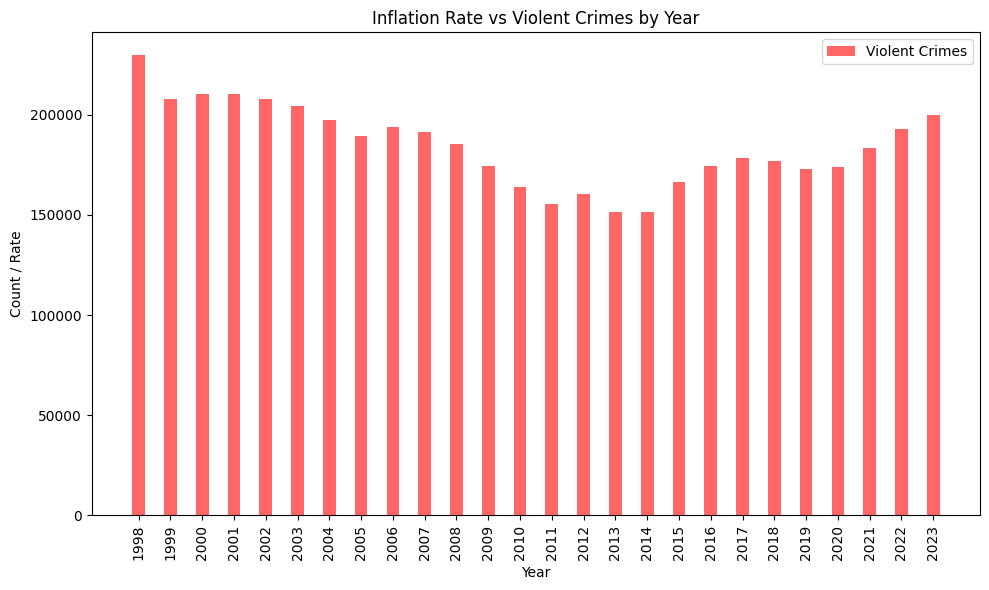

In [12]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(df['Year'] , df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='red', alpha=0.6,  align='center')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.title('Inflation Rate vs Violent Crimes by Year')
plt.xticks(df['Year'])
plt.legend()

plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

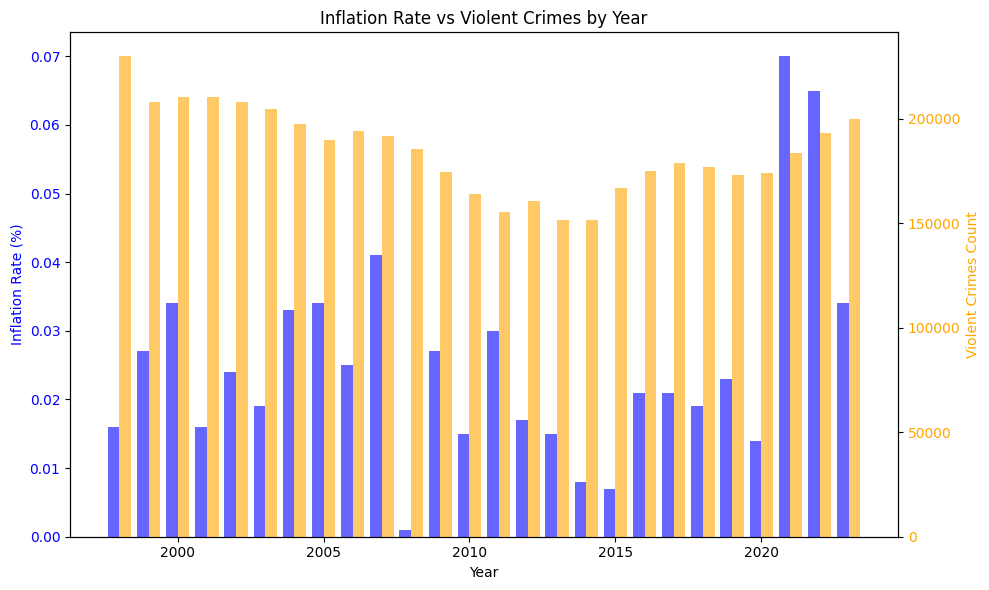

In [13]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first bar plot (Inflation Rate)
ax1.bar(df['Year'] - 0.2, df['Inflation_Rate'], width=0.4, label='Inflation Rate', color='blue', alpha=0.6, align='center')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Violent Crimes by Year')

# Creating the second y-axis for Violent Crimes
ax2 = ax1.twinx()
ax2.bar(df['Year'] + 0.2, df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='orange', alpha=0.6, align='center')

# Adding labels and title for the second plot
ax2.set_ylabel('Violent Crimes Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
plt.xticks(rotation=90)

# Display the plot
fig.tight_layout()
plt.show()

In [14]:
print(df.dtypes)

Year                              int64
Violent_Crimes                    int32
Homicide                         object
Sexual_Assault_Prior_to_2014     object
Sexual_Assault                   object
                                 ...   
Other Property                   object
Inflation_Rate                  float64
Federal_Funds_Rate               object
Business_Cycle                   object
Enents Affecting Inflation       object
Length: 62, dtype: object


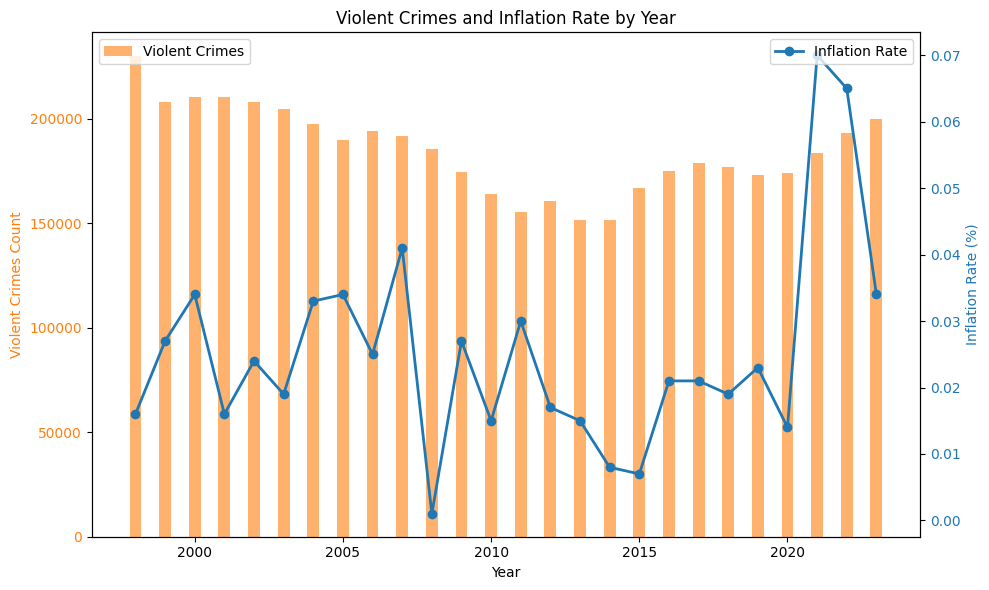

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bars for Violent Crimes
ax1.bar(df['Year'], df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='#ff7f0e', alpha=0.6, align='center')

# Adding labels and title for the first plot (Violent Crimes)
ax1.set_xlabel('Year')
ax1.set_ylabel('Violent Crimes Count', color='#ff7f0e')
ax1.tick_params(axis='y', labelcolor='#ff7f0e')

# Creating the second y-axis for Inflation Rate (line plot)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Inflation_Rate'], marker='o', color='#1f77b4', linewidth=2, label='Inflation Rate')

# Adding labels and title for the second plot (Inflation Rate)
ax2.set_ylabel('Inflation Rate (%)', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Adding title and legend
ax1.set_title('Violent Crimes and Inflation Rate by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

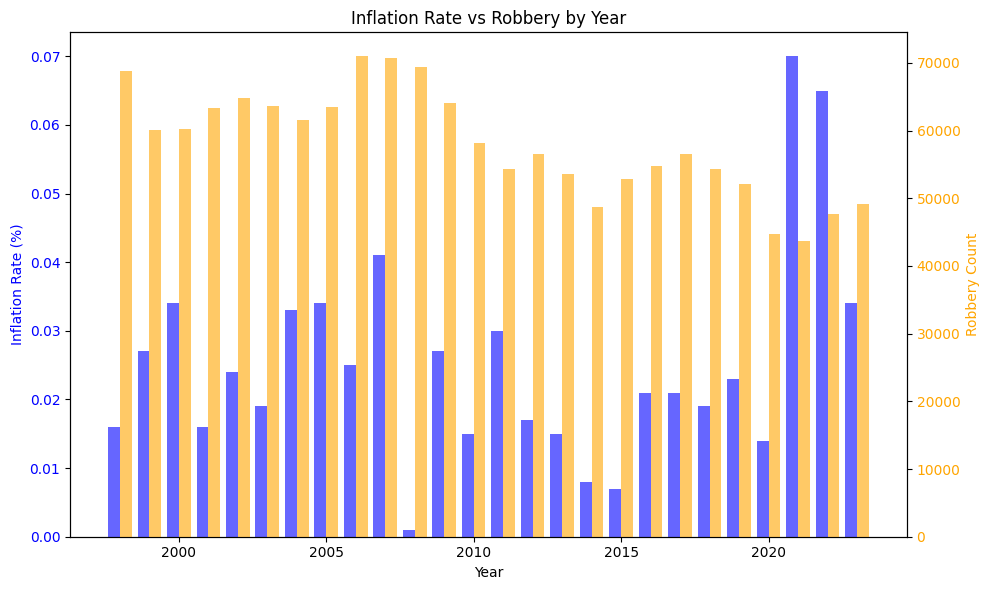

In [16]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first bar plot (Inflation Rate)
ax1.bar(df['Year'] - 0.2, df['Inflation_Rate'], width=0.4, label='Inflation Rate', color='blue', alpha=0.6, align='center')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Robbery by Year')

# Creating the second y-axis for Violent Crimes
ax2 = ax1.twinx()
ax2.bar(df['Year'] + 0.2, df['Robbery'], width=0.4, label='Robbery', color='orange', alpha=0.6, align='center')

# Adding labels and title for the second plot
ax2.set_ylabel('Robbery Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
plt.xticks(rotation=90)

# Display the plot
fig.tight_layout()
plt.show()

In [17]:
filtered_df = df[(df['Year'] >= 1999) & (df['Year'] <= 2020)]

filtered_df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation
1,1999,207874,"2,006","9,443","7,757","1,686",60027,"19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",0.027,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,210492,"2,074","9,785","8,197","1,588",60243,"20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",0.034,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,210510,"2,201","9,882","8,219","1,663",63299,"22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",0.016,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,207988,"2,392","10,176","8,620","1,556",64805,"23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",0.024,1.25%,Expansion (1.7%),War on Terror
5,2003,204591,"2,402","9,918","8,461","1,457",63597,"22,155","6,453","5,644",...,"146,475","256,026","13,677","3,992","5,419","4,266",0.019,1.00%,Expansion (2.8%),Jobs and Growth Tax Relief Reconciliation Act


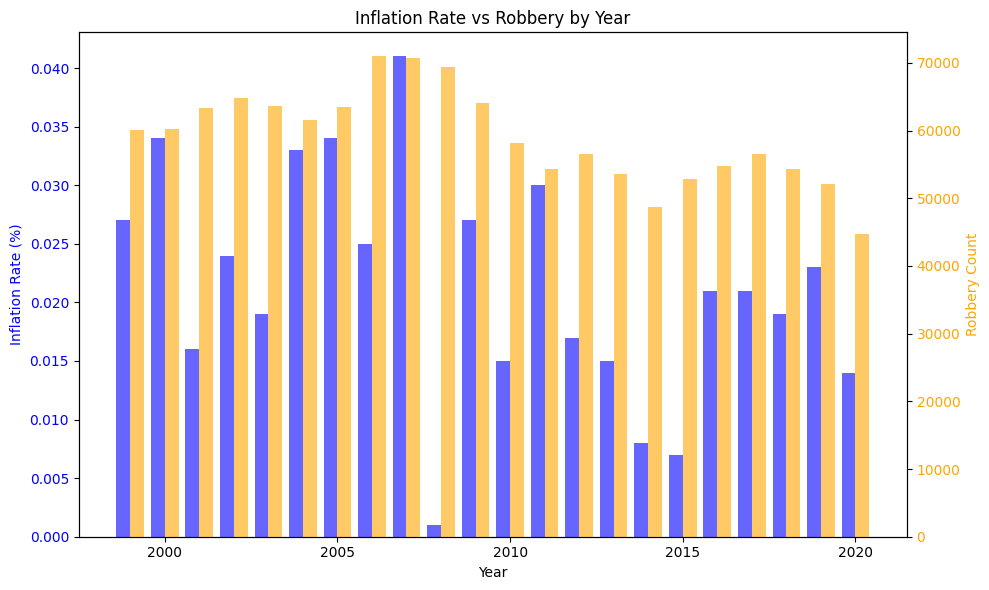

In [18]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first bar plot (Inflation Rate)
ax1.bar(filtered_df['Year'] - 0.2, filtered_df['Inflation_Rate'], width=0.4, label='Inflation Rate', color='blue', alpha=0.6, align='center')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Robbery by Year')

# Creating the second y-axis for Violent Crimes
ax2 = ax1.twinx()
ax2.bar(filtered_df['Year'] + 0.2, filtered_df['Robbery'], width=0.4, label='Robbery', color='orange', alpha=0.6, align='center')

# Adding labels and title for the second plot
ax2.set_ylabel('Robbery Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
plt.xticks(rotation=90)

# Display the plot
fig.tight_layout()
plt.show()

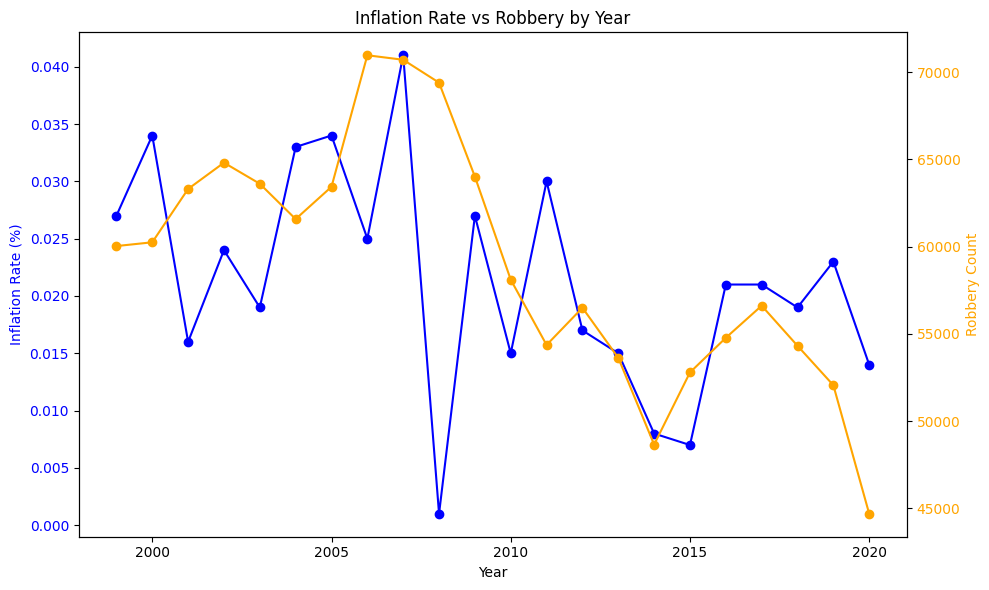

In [19]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first line plot (Inflation Rate)
ax1.plot(filtered_df['Year'], filtered_df['Inflation_Rate'], label='Inflation Rate', color='blue', marker='o')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Robbery by Year')

# Creating the second y-axis for Robbery
ax2 = ax1.twinx()
ax2.plot(filtered_df['Year'], filtered_df['Robbery'], label='Robbery', color='orange', marker='o')

# Adding labels and title for the second plot
ax2.set_ylabel('Robbery Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
plt.xticks(rotation="vertical", rotation_mode="anchor", ha="right", wrap=True)

# Display the plot
fig.tight_layout()
plt.show()

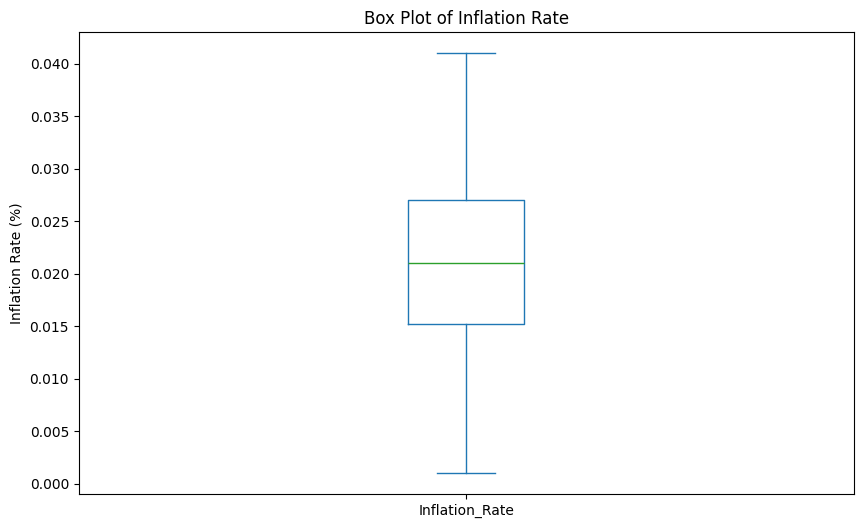

In [20]:
# Creating the box plot
plt.figure(figsize=(10, 6))
filtered_df['Inflation_Rate'].plot.box()
plt.title('Box Plot of Inflation Rate')
plt.ylabel('Inflation Rate (%)')

# Display the plot
plt.show()

In [29]:
# Calculate the correlation coefficient
correlation = filtered_df['Inflation_Rate'].corr(filtered_df['Robbery'])

print(f"Correlation Coefficient between Inflation Rate and Robbery Count: {correlation}")

Correlation Coefficient between Inflation Rate and Robbery Count: 0.3681592864029376


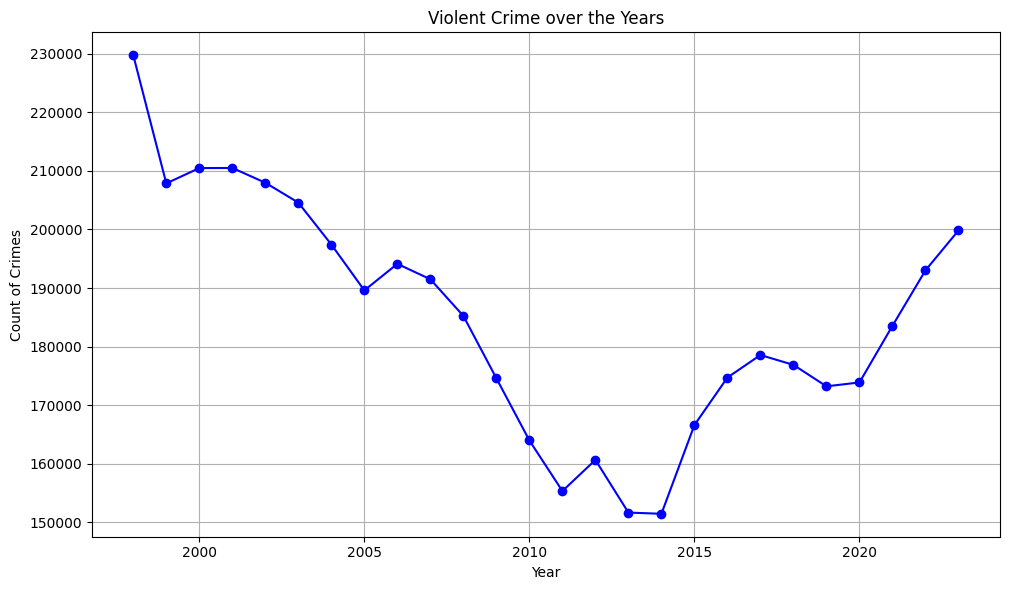

In [73]:
# Question 1:
# How have crime rates in California changed from 1998 to 2023?
# Plotting multiple lines
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Count of Crimes")
plt.title("Violent Crime over the Years")

plt.grid()
plt.tight_layout()
# # Plot each series as a separate line
plt.plot(df.index, df['Violent_Crimes'], marker='o', linestyle='-', color='b', label='Violent Crimes')
plt.plot(df.index, df['Property Crimes'], marker='s', linestyle='--', color='g', label='Property Crimes')
plt.plot(df.index, df['Larceny-Theft'], marker='^', linestyle='-.', color='r', label='Larceny-Theft')


In [71]:
# code for chaning the datatype for needed columns. Do not run again as it will cause error after this point
# df["Larceny-Theft"] = df["Larceny-Theft"].str.replace(',', '').astype(float)
# df["Property Crimes"] = df["Property Crimes"].str.replace(',', '').astype(float)
# df["Purse-Snatching"] = workable_df["Shoplifting"].str.replace(',', '').astype(float)


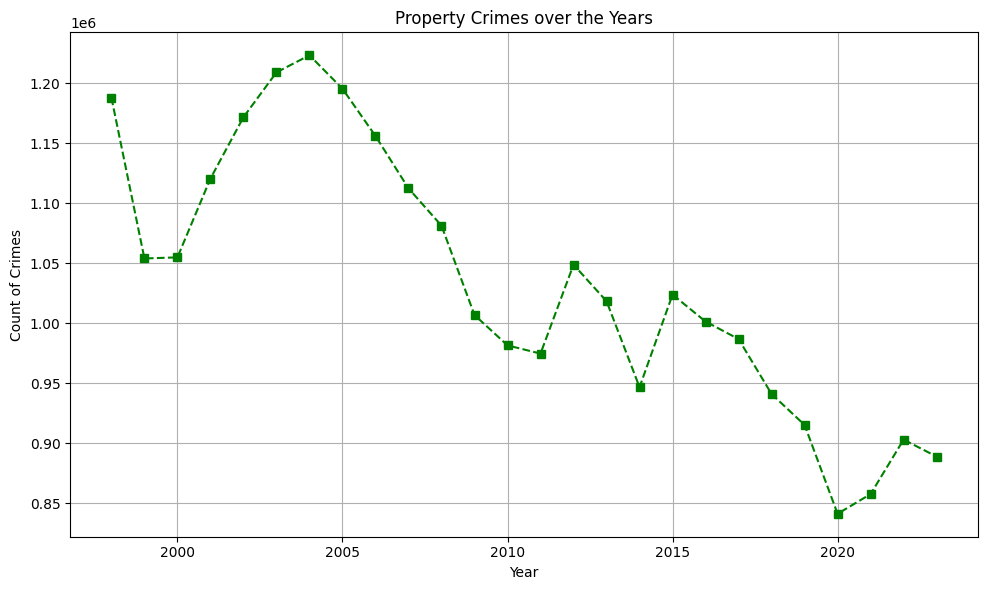

In [72]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Count of Crimes")
plt.title("Property Crimes over the Years")

plt.grid()
plt.tight_layout()
plt.plot(df.index, df['Property Crimes'], marker='s', linestyle='--', color='g', label='Property Crimes')


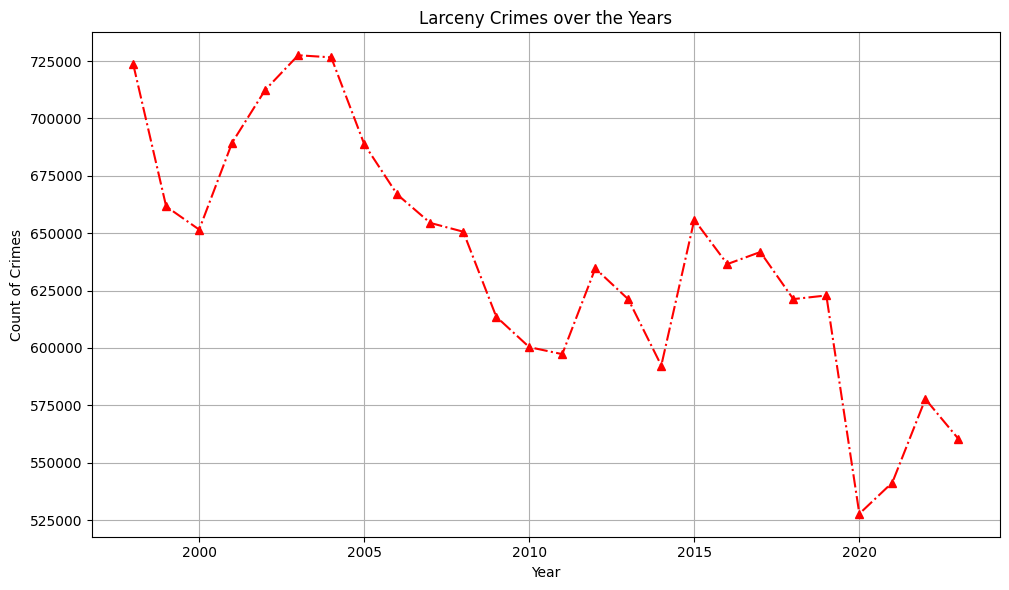

In [79]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Count of Crimes")
plt.title("Larceny Crimes over the Years")
plt.grid()
plt.tight_layout()
plt.plot(df.index, df['Larceny-Theft'], marker='^', linestyle='-.', color='r', label='Larceny-Theft')

In [114]:
# Grabbing columns into a new dataframe for ease of use, and to prevent original df from malfunctioning

violent_crimes = df["Violent_Crimes"]
property_crimes = df["Property Crimes"]
larceny_crimes = df["Larceny-Theft"]
target_crimes = {"Violent Crimes" : violent_crimes,
                 "Property Crimes" : property_crimes,
                 "Larceny-Theft Crimes" : larceny_crimes}

crime_overview_df = pd.DataFrame(target_crimes)
crime_overview_df

crime_overview_df_log= np.log(crime_overview_df)


# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(crime_overview_df)
scaled_data

# Convert scaled data back to DataFrame
df_scaled_crime = pd.DataFrame(scaled_data, columns=crime_overview_df.columns, index=crime_overview_df.index)
df_scaled_crime
# df1.set_index('Year', inplace=True)
# df2.set_index('Year', inplace=True)

# # Joining df2 columns to df1
# df1 = df1.join(df2)

,Violent Crimes,Property Crimes,Larceny-Theft Crimes
Year,,,
1998,1.000000,0.907635,0.981009
1999,0.720555,0.556825,0.670216
2000,0.753973,0.559243,0.619765
2001,0.754203,0.730995,0.809610
2002,0.722010,0.864877,0.924376
2003,0.678648,0.962720,1.000000
2004,0.587266,1.000000,0.995430
2005,0.487203,0.926999,0.806251
2006,0.545091,0.823962,0.696374


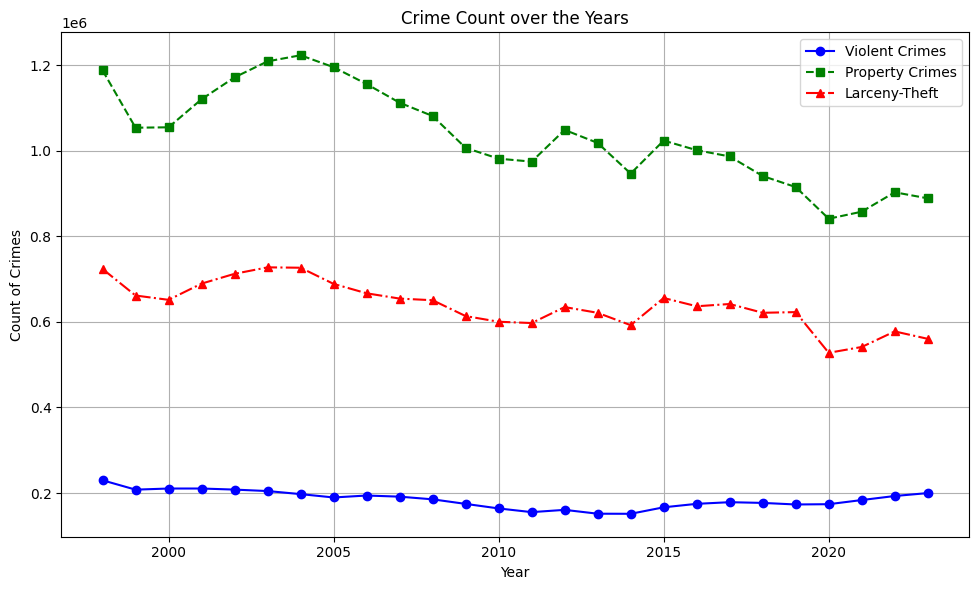

In [77]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Count of Crimes")
plt.title("Crime Count over the Years")

plt.grid()
plt.tight_layout()
# # Plot each series as a separate line
plt.plot(df.index, df['Violent_Crimes'], marker='o', linestyle='-', color='b', label='Violent Crimes')
plt.plot(df.index, df['Property Crimes'], marker='s', linestyle='--', color='g', label='Property Crimes')
plt.plot(df.index, df['Larceny-Theft'], marker='^', linestyle='-.', color='r', label='Larceny-Theft')
plt.legend()

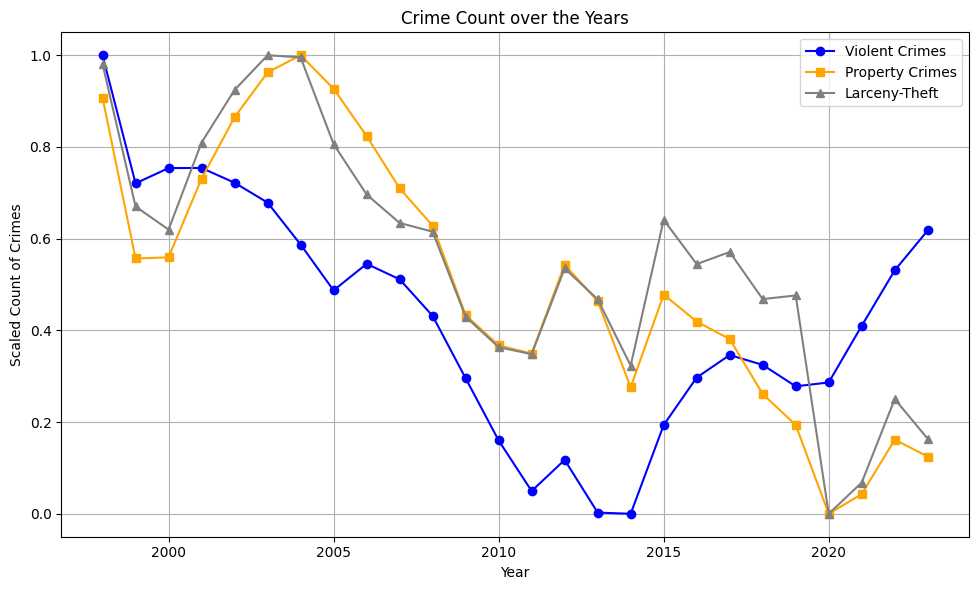

In [118]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Scaled Count of Crimes")
plt.title("Crime Count over the Years")

plt.grid()
plt.tight_layout()
# # Plot each series as a separate line
plt.plot(df_scaled_crime.index, df_scaled_crime['Violent Crimes'], marker='o', linestyle='-', color='b', label='Violent Crimes')
plt.plot(df_scaled_crime.index, df_scaled_crime['Property Crimes'], marker='s', linestyle='-', color='orange', label='Property Crimes')
plt.plot(df_scaled_crime.index, df_scaled_crime['Larceny-Theft Crimes'], marker='^', linestyle='-', color='grey', label='Larceny-Theft')
plt.legend()

SyntaxError: incomplete input (2920697358.py, line 3)